**2.1.1 Problem 1: Softmax layer example**

Assume you have a 3-class problem and that a network input xn results in the following inputs to the Softmax layer: v1n = 1, v2n = 3, v3n = 9.

(a) Determine the corresponding three outputs ykn fomr the Softmax layer.

(b) Based on the results in (a) and what is shown in Fig.1, try to explain the (partly improper) name “Softmax”.


**ANSWER:**

Using the formula for ykn for each  input element vin, the corresponding three outputs ykn from the Softmax layer are: [0,0,1], as seeng in the picture below.

The function Softmax "smooths" the difference between the near values of x in comparison with the exponential function and because it divides by the sum of exponentials, it normalizes those values, ensuring the output lies between the 0 and 1 and sums to 1, therefore it has a probabilistic interpretation.

It emphasizes larger values more than smaller ones but still assigning non-zero probabilities to the smaller values. This "softens" the strict selection of the maximum.

For inputs close together, the outputs are more evenly distributed. For inputs far apart, the largest input dominates the probabilities, closely approximating the behavior of the hardmax.


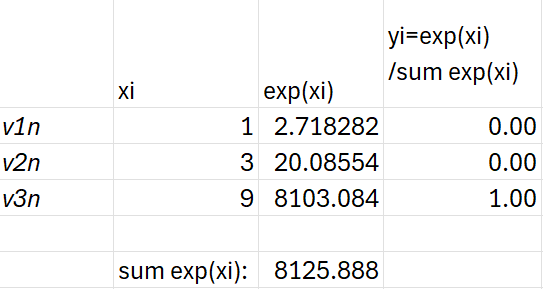

**2.1.2 Problem 2: Softmax layer properties**

(a) Show/confirm that all outputs yk from a softmax layer always are restricted to the unit interval [0.1].

(b) Show/confirm the K softmax outputs always sum to one, regardless of what are the inputs:
y1 + y2 + ... + yK = 1.

**ANS:**

Every output yk is part of an output set, consisting of its corresponding x evaluated in an exponential function, divided by the sum of all the exponential outputs together, therefore each output value cannot be greater than the sum of all them.

The value of each output yk is a portion of the total normalized set, therefore by summing these the maximum obtained value is 1.

Although the bigger the distance between the inputs "x" the bigger the influence of one input with respect to the others in the output set.


**2.2.1 Problem 3: Average Cross Entropy**

Assume you have a a 3-class classification problem where your ANN model produces the output q1 = [0.01, 0.9, , 0.09]T for input example x1 and the output q2 = [0.8, 0.15, 0.05]T for input example x2.

Determine the average Cross Entropy for this result if x1 belongs to class 2 and x2 belongs to
class 1. Hint: This means that the desired output distributions for the two inputs x1 and x2 are p1 = [0, 1, 0] and p2 = [1, 0, 0], respectively.

**ANS:**
In the picture below

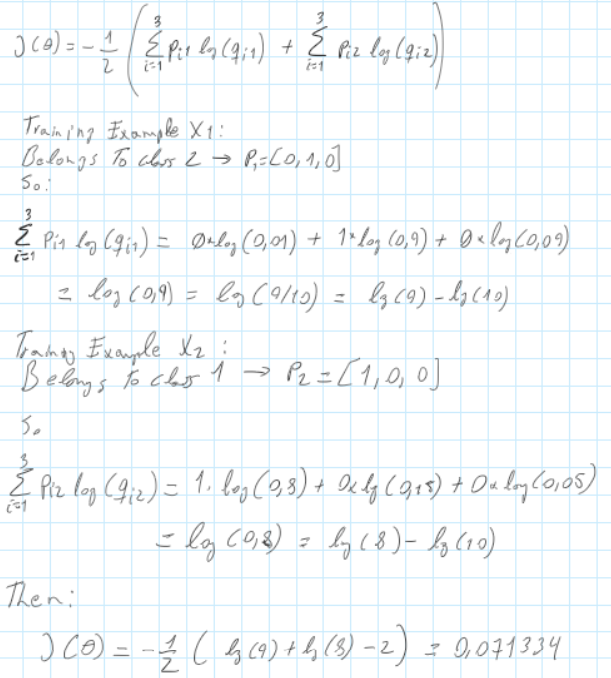

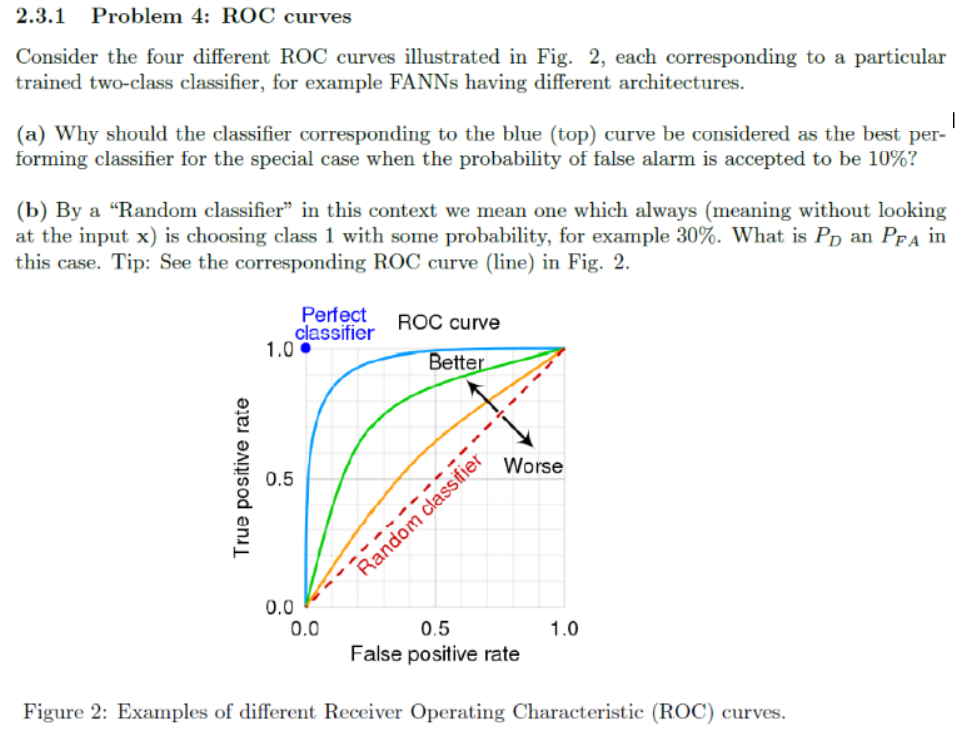

**ANSWER (a):**

when PFA = 0.1:

For the blue line, the PD = 0.85 approx.

For the green line, the PD = 0.4

For the orange line is lower.

Therefore the best performing classifier is the one corresponding to the blue line.


**ANSWER (b):**

In such case the class 1 has the same probability of being chosen regardless of the actual input, therefore PD and PFA will always have the same value.


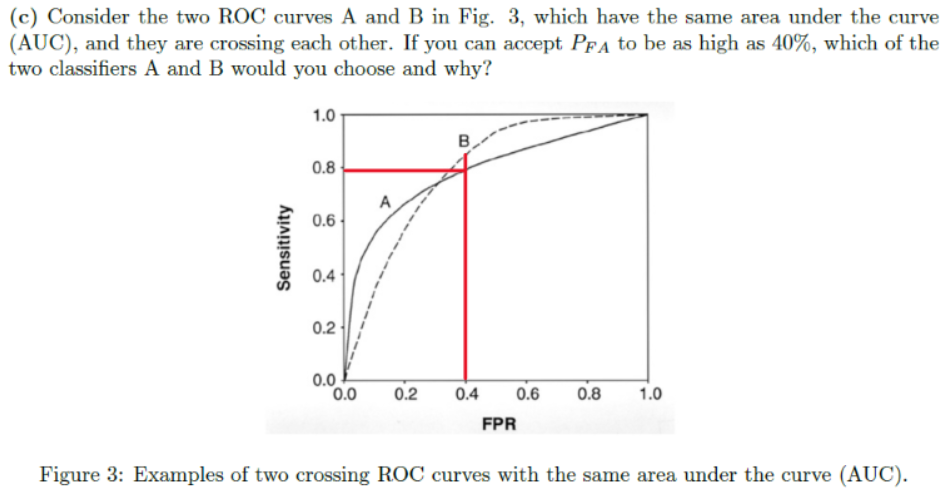

**ANSWER (c)**

For a PFA = 0.4, the classifier A has a PD = 0.8 approx (see figure above), whereas classifier B has a PD a little bit higher than that.

So I would choose B because the probability of detection is higher for the same probability of false alarm.


**PROBLEMS 3.3**

Task A: Two-class Signal Classification by FANNs

(a) Use the above code to get access to the signal dataset. Then explore it to find answers to the following: How many signals does the dataset contains and how long (in terms of time points) is each signal?

(b) Plot some of the signals in the dataset with their labels (normal/abnormal) shown in the plot
title. Thus they should look like similar to the ones shown in Fig. 5.

In [3]:
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)
os.chdir('drive')
os.chdir('MyDrive')
os.chdir('AI_for_IA')
os.chdir('MA3_AI')

Mounted at /content/drive/


In [4]:
import os
os.getcwd()

'/content/drive/MyDrive/AI_for_IA/MA3_AI'

In [4]:
def plot3_2(dataset, indices, figsize=(12, 8)):
    """
    Plot each signal in an individual subplot arranged in two columns.

    Args:
        indices (list[int]): List of indices of the signals to plot.
        figsize (tuple): Size of the entire figure.
    """
    import math
    import matplotlib.pyplot as plt

    # Number of subplots: rows and columns
    num_signals = len(indices)
    num_cols = 2  # Two columns
    num_rows = math.ceil(num_signals / num_cols)  # Calculate required rows

    # Create the figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, idx in enumerate(indices):
        signal = dataset[idx][0]  # Retrieve the signal
        axes[i].plot(signal)  # Plot the signal on its respective axis
        if dataset[idx][1] == 0: sigType = "Normal"
        else: sigType = "Abnormal"
        axes[i].set_title(f"Signal {idx} - {sigType}")
        #axes[i].set_xlabel("Sample Index")
        #axes[i].set_ylabel("Amplitude")
        axes[i].grid(True)

    # Hide unused subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


In [18]:
import help_code_ann_for_classification as help_code

# Provides back a PyTorch Dataset OBJECT !
#each "record" represents a signal and
#it contains a tensor with 500 csv values and a number 0 "normal" or 1 "abnormal"
signal_dataset = help_code . SignalDataset (train=True)
size_of_signal_dataset = len ( signal_dataset ) # Print size of whole dataset

# Making a PyTorch DataLoader Object specifically for your Signal dataset that you got above .
import torch
import torch .nn as nn
from torch . utils . data import DataLoader
#signal_dataloader = DataLoader ( dataset = signal_dataset , batch_size =.... , shuffle = True )

There are 1384 signals in the dataset from the train folder
Each signal contains 500 points
Here some of them:



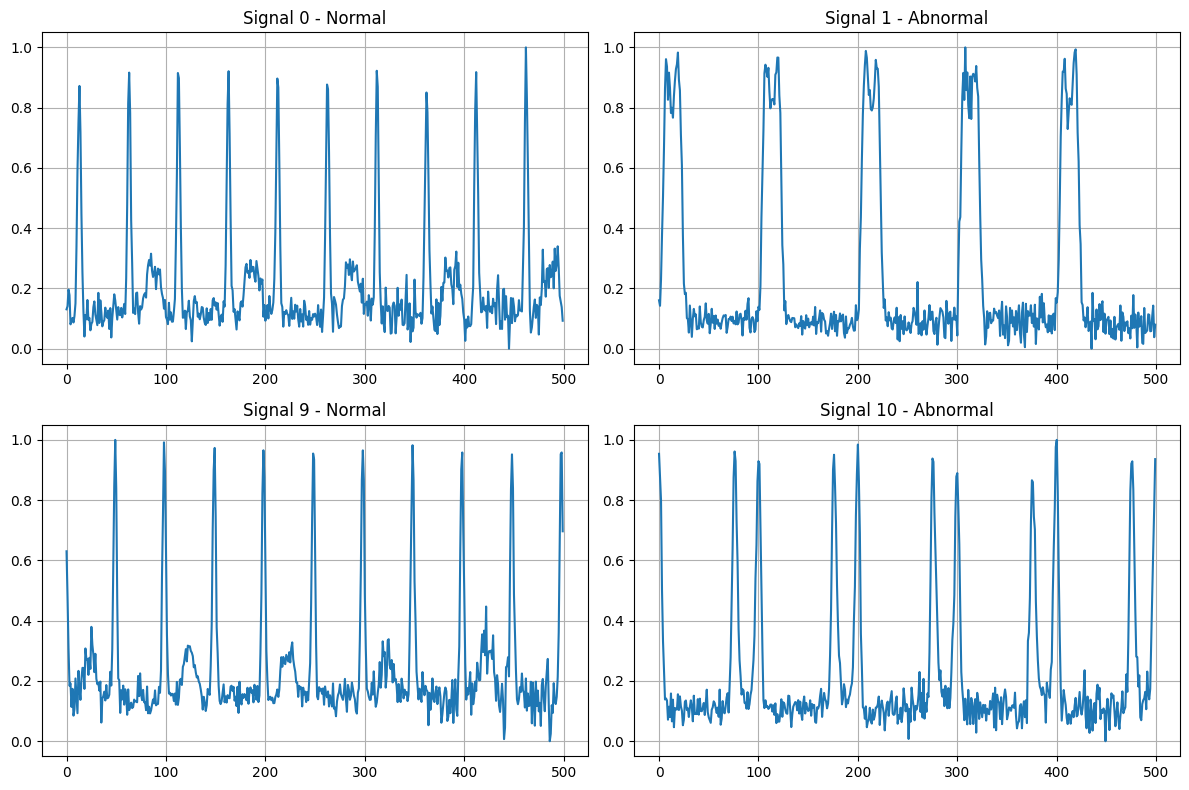

In [19]:
#How many signals in the dataset?

print(f'There are {size_of_signal_dataset} signals in the dataset from the train folder')
print(f'Each signal contains {len(signal_dataset[0][0])} points')
print(f'Here some of them:\n')
plot3_2(signal_dataset, indices=[0,1,9, 10])

In [7]:
# Plot your cost
def plotCost(costList):
  import matplotlib.pyplot as plt
  plt.figure( figsize =[10 ,5])
  plt.plot ( costList )
  plt.xlabel ('update step i on mini - batch')
  plt . ylabel ('Cost ')
  plt . title ('Cost during training on train - set ( per mini - batch )')
  plt . grid ()

**3.3 (c) trough (f)**

Very basic training loop, consisting of only the mini-batch SGD inner-loop,without anything extra.

At this stage you just want to check if you can make the cost/loss on the mini-batches go down.

 Train set Size : 968
 Val set Size : 276
 Test set Size : 140

Final value of the cost function (MSE): 0.0021362020634114742 



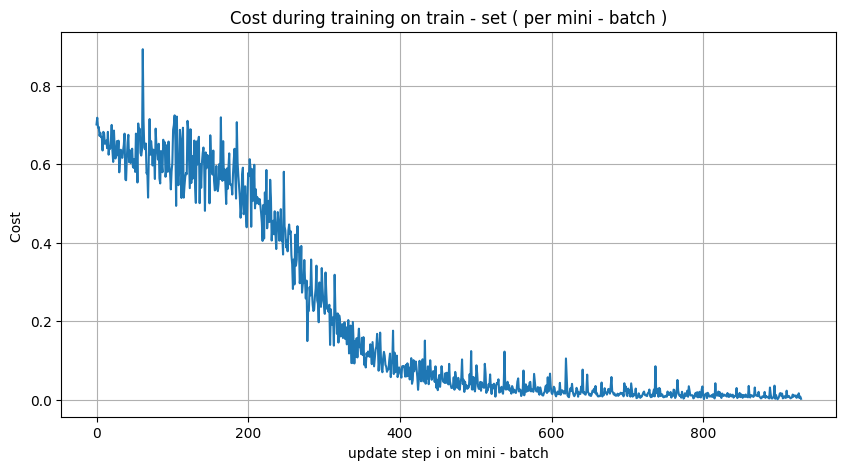

In [22]:
# 1. & 2. Split or get Data into train , validation and test sets
#Specify split fractions : ! Must sum to 1!
train_fraction = 0.70
val_fraction = 0.20
test_fraction = 1 - (train_fraction + val_fraction)

# Determine size of each set
train_dataset_size = int( train_fraction * size_of_signal_dataset )
val_dataset_size = int ( val_fraction * size_of_signal_dataset )
test_dataset_size = int( size_of_signal_dataset - train_dataset_size - val_dataset_size )

#Split whole original data into train , val and test datasets
train_dataset,val_dataset,test_dataset = torch.utils.data.random_split( signal_dataset ,
                                                          [ train_dataset_size ,
                                                          val_dataset_size ,
                                                          test_dataset_size ])

#Sanity checking
print (f" Train set Size : { len ( train_dataset )}")
print (f" Val set Size : { len ( val_dataset )}")
print (f" Test set Size : { len ( test_dataset )}")

# 3. Make a DataLoader object to take of ’serving ’ you mini - batches of your data .
#Mini-batch size to be somewhere between 1% to 50% of the number of examples in the training data set
batchSize = 32  #int(0.30*len(train_dataset))
nr_epochs = 30

#signal_dataloader = DataLoader ( dataset = signal_dataset , batch_size =.... , shuffle = True )
signal_dataloader = DataLoader ( dataset = train_dataset , batch_size = batchSize , shuffle =True) # create your dataloader from dataset

# 4. Define and construct your neural network architecture .

#FF ANN with 500 inputs (the dimension of each input signal) , 9 neurons in the first hidden layer , 7 neurons in the second hidden layer
# and 2 output neurons (for 2 classes) .
model = nn. Sequential (
    nn. Linear ( in_features =500, out_features =32) ,
    nn.ReLU() ,
    nn. Linear ( in_features =32, out_features =16) ,
    nn.ReLU() ,
    nn. Linear ( in_features =16, out_features =2),
)

#5. Define and Pick a suitable cost function depending on your problem type
# regression or classifiction problem

#Cost function for training: CrosEntropyLos which already uses SoftMax
# Suitable for multi-class classification
cost_function = nn.CrossEntropyLoss()

#6. Define and Set an Optimizer object that takes care of the SGn Decent update step .
#Stochastic Gradient Descent (SGD) adjusts the model's parameters to minimize the cost function.
optimizer = torch.optim.SGD( model.parameters () , lr =0.05 )



# 8. Set number of epochs to train for
# Set the epoch interval model performance evaluation , ie evaluate model every k’th epoch .
# NN Training
#
import numpy as np
#A list for keeping track of the cost of each mini-batch associated with each parameter update
training_minibatch_Js = []
eval_every_kth = int(nr_epochs/2)
# Outer loop : Iterate through whole dataset nr_epochs times and evaluate repeatedly
for epoch_i in range ( nr_epochs ):

    # Model Performance evaluation block

    # Inner loop : Model Parameter update using mini - batch SGD blocks
    for X_batch , y_batch in signal_dataloader : # Iterate through mini - batches
        y_preds = model ( X_batch ) # Make Prediction on mini - batch
        cost = cost_function( y_preds , y_batch )  # Compute cost for mini - batch
        optimizer.zero_grad ()  # Set the grads of all model params to zero .
        cost.backward() # compute and populate gradients of model params
        optimizer.step () # Instruct optimizer to take one update step ( using SGD )

        #gather the points for plotting them
        training_minibatch_Js.append ( cost.item ())


# 9. Evaluate resulting ’ performance ’
#test_cost = evaluate_model_performance ( model , test_dataset )

plotCost(training_minibatch_Js)
#plotCost([np.mean(training_minibatch_Js[i:i+10]) for i in range(0, len(training_minibatch_Js), 10)])
print(f'\nFinal value of the cost function (MSE): {cost.item()} \n')


**3.3 (g)**

Define the function for model performance evaluation based on the template.

Remember, this is classification task, and as such we should be interested in the accuracy of our model.

In [9]:
# 7. Define how you evaluate your model performance as a function .
from sklearn.metrics import accuracy_score

def evaluate_model_performance ( model, eval_dataset, cost_function ):
# Function that takes in a model a dataset and a cost_function
# and outputs a performance estimate of the model in the form of the value
#returned by the cost_function.
#It also returns the performance accuracy value

#Dataloader for the dataset .We are not performing any SGD here , so our batch
# size is the whole # dataset , for which we want to evaluate  model performance on.
 d_loader = DataLoader ( dataset = eval_dataset , batch_size = len( eval_dataset ))

 total_dataset=0
 correct=0

 # Make predictions for the whole eval dataset in one iteration
 model.eval () # Sets model in evaluation ( inference ) mode

 # Dropout , layer normalization etc are turned off
 with torch . no_grad ():
    for X, y in d_loader :
      raw_y_preds = model (X)

      y_class_preds = raw_y_preds.argmax ( dim =1) # compute class labels for each x_n
      total_dataset += y.size(0)
      correct += (y_class_preds == y).sum().item()  #we count those predictions that matches the actual label

 model.train () # Reset the model in " training " mode
                  # Dropput and layer normalization etc are turned on

 # Calculate the performance
 eval_perf = cost_function ( raw_y_preds , y).item ()

 accuracy = correct / total_dataset

 return eval_perf, accuracy

**3.3 (h)**

Integrate your model performance evaluation function into your training loop and perform model
evaluation on both validation and train sets for every epoch, before the inner SGD training loop.
Keep track and store these performance metrics during your whole training session, because you will
need to plot and report these values for your fully trained network

In [10]:
# Plot your cost
def plotCost2(trainCostList, valCostList, label1='Train set', label2='Validation set', title='Cost-entropy cost troughout training'):
  import matplotlib.pyplot as plt
  plt.figure( figsize =[10 ,5])
  plt.plot ( trainCostList, color = 'blue', label= label1 )
  plt.plot ( valCostList, color = 'red', label= label2 )
  plt.xlabel ('epochs')
  plt.ylabel ('Cross-entropy Cost')
  plt.legend(fontsize=10)
  plt.title (title)
  plt.grid ()

 Train set Size : 968
 Val set Size : 276
 Test set Size : 140
Epoch 1 - Train cost: 0.70702469 - Train Acc: 0.33677686
Epoch 1 - Val cost: 0.70416194 - Val Acc: 0.37318841
Epoch 2 - Train cost: 0.64666724 - Train Acc: 0.66322314
Epoch 2 - Val cost: 0.65967327 - Val Acc: 0.62681159
Epoch 3 - Train cost: 0.63075155 - Train Acc: 0.66322314
Epoch 3 - Val cost: 0.65086728 - Val Acc: 0.62681159
Epoch 4 - Train cost: 0.62072974 - Train Acc: 0.66322314
Epoch 4 - Val cost: 0.64434212 - Val Acc: 0.62681159
Epoch 5 - Train cost: 0.60834283 - Train Acc: 0.66322314
Epoch 5 - Val cost: 0.63595366 - Val Acc: 0.62681159
Epoch 6 - Train cost: 0.58957654 - Train Acc: 0.66322314
Epoch 6 - Val cost: 0.61983401 - Val Acc: 0.62681159
Epoch 7 - Train cost: 0.56254888 - Train Acc: 0.66322314
Epoch 7 - Val cost: 0.59046817 - Val Acc: 0.62681159
Epoch 8 - Train cost: 0.51498073 - Train Acc: 0.66632231
Epoch 8 - Val cost: 0.54909289 - Val Acc: 0.62681159
Epoch 9 - Train cost: 0.45123103 - Train Acc: 0.78925620


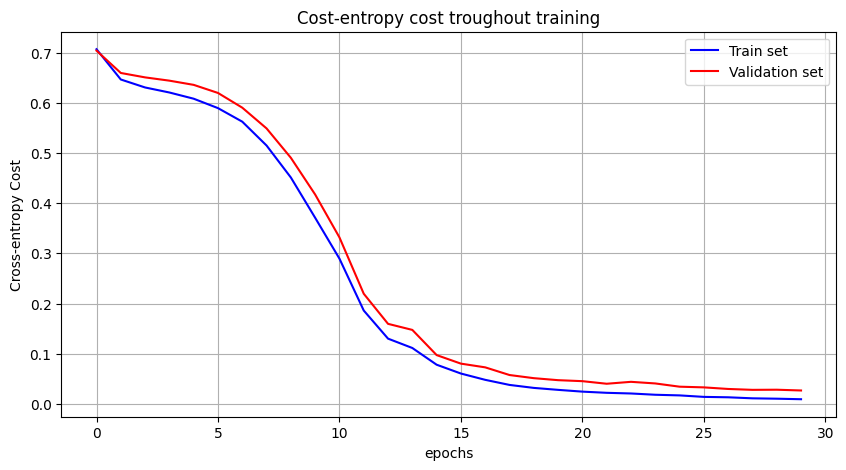

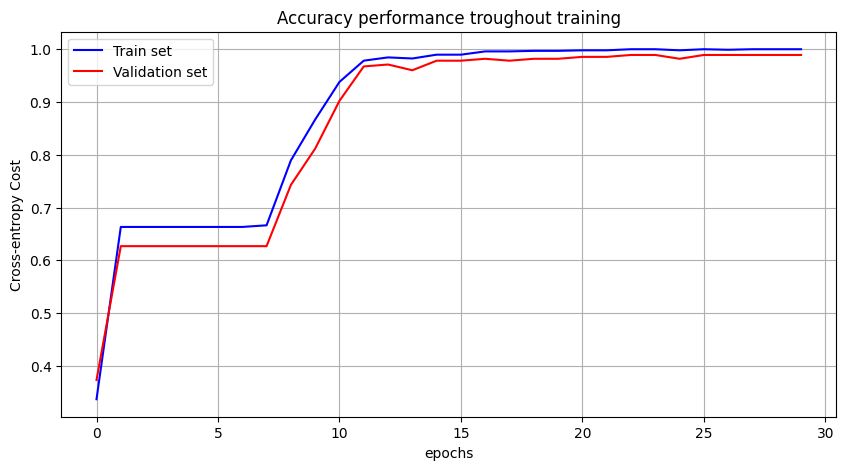

In [11]:
# 1. & 2. Split or get Data into train , validation and test sets
#Specify split fractions : ! Must sum to 1!
train_fraction = 0.70
val_fraction = 0.20
test_fraction = 1 - (train_fraction + val_fraction)

# Determine size of each set
train_dataset_size = int( train_fraction * size_of_signal_dataset )
val_dataset_size = int ( val_fraction * size_of_signal_dataset )
test_dataset_size = int( size_of_signal_dataset - train_dataset_size - val_dataset_size )

#Split whole original data into train , val and test datasets
train_dataset,val_dataset,test_dataset = torch.utils.data.random_split( signal_dataset ,
                                                          [ train_dataset_size ,
                                                          val_dataset_size ,
                                                          test_dataset_size ])

#Sanity checking
print (f" Train set Size : { len ( train_dataset )}")
print (f" Val set Size : { len ( val_dataset )}")
print (f" Test set Size : { len ( test_dataset )}")

# 3. Make a DataLoader object to take of ’serving ’ you mini - batches of your data .
#Mini-batch size to be somewhere between 1% to 50% of the number of examples in the training data set
batchSize = 32  #int(0.30*len(train_dataset))
nr_epochs = 30

#signal_dataloader = DataLoader ( dataset = signal_dataset , batch_size =.... , shuffle = True )
signal_dataloader = DataLoader ( dataset = train_dataset , batch_size = batchSize , shuffle =True) # create your dataloader from dataset

# 4. Define and construct your neural network architecture .

#FF ANN with 500 inputs (the dimension of each input signal) , 9 neurons in the first hidden layer , 7 neurons in the second hidden layer
# and 2 output neurons (for 2 classes) .
model = nn. Sequential (
    nn. Linear ( in_features =500, out_features =32) ,
    nn.ReLU() ,
    nn. Linear ( in_features =32, out_features =16) ,
    nn.ReLU() ,
    nn. Linear ( in_features =16, out_features =2),
)

#5. Define and Pick a suitable cost function depending on your problem type
# regression or classifiction problem

#Cost function for training: CrosEntropyLos which already uses SoftMax
# Suitable for multi-class classification
cost_function = nn.CrossEntropyLoss()

#6. Define and Set an Optimizer object that takes care of the SGn Decent update step .
#Stochastic Gradient Descent (SGD) adjusts the model's parameters to minimize the cost function.
optimizer = torch.optim.SGD( model.parameters () , lr =0.05 )
#optimizer = torch.optim.Adam(model.parameters(), lr=0.005)


# 8. Set number of epochs to train for
# Set the epoch interval model performance evaluation , ie evaluate model every k’th epoch .
# NN Training
#
import numpy as np
#A list for keeping track of the cost of each mini-batch associated with each parameter update
#training_minibatch_Js = []
training_epoch_Js = []
validation_epoch_Js = []
training_acc = []
validation_acc = []
#eval_every_kth = int(nr_epochs/2)
# Outer loop : Iterate through whole dataset nr_epochs times and evaluate repeatedly
for epoch_i in range ( nr_epochs ):

    # Model Performance evaluation block
    # EVALUATE Model ’ performance ’ on whole train and validation dataset
    train_cost,train_acc = evaluate_model_performance ( model , train_dataset,cost_function )
    val_cost, val_acc = evaluate_model_performance ( model , val_dataset,cost_function )
    # track performance measures from both train and val sets
    print(f"Epoch {epoch_i + 1} - Train cost: {train_cost:.8f} - Train Acc: {train_acc:.8f}")
    print(f"Epoch {epoch_i + 1} - Val cost: {val_cost:.8f} - Val Acc: {val_acc:.8f}")

    #for plotting:
    training_epoch_Js.append(train_cost)
    validation_epoch_Js.append(val_cost)
    training_acc.append(train_acc)
    validation_acc.append(val_acc)

    #if epoch_i % eval_every_kth ==0: # Eval model very k’th epoch .
        # Optional stopping criteria based on validation and/or
        # train set performance / cost to ovoid overfitting .

    # Inner loop : Model Parameter update using mini - batch SGD blocks
    for X_batch , y_batch in signal_dataloader : # Iterate through mini - batches
        y_preds = model ( X_batch ) # Make Prediction on mini - batch
        cost = cost_function( y_preds , y_batch )  # Compute cost for mini - batch
        optimizer.zero_grad ()  # Set the grads of all model params to zero .
        cost.backward() # compute and populate gradients of model params
        optimizer.step () # Instruct optimizer to take one update step ( using SGD )

# 9. Evaluate resulting ’ performance ’
#test_cost = evaluate_model_performance ( model , test_dataset )

plotCost2(training_epoch_Js, validation_epoch_Js)
print(f'\nFinal value of the cost function (MSE): {cost.item()} \n')
plotCost2(training_acc, validation_acc, title='Accuracy performance troughout training')


**3.3 (i)  **

From the results obtained showing the results on the training and validation sets in the same
graph, do you see any signs of overfitting?

Since the accuracy of the training set is not significantly higher than the accuracy of the validation set, we could say that the model is not overfitted.

**4 Task B** Multi-class Image Classification of FashionMNIST
by FANNs

**4.4 The actual tasks to perform**

(a) Repeat the procedure you performed when designing and testing the signal classifiers in Task
A, this time using the FashionMNIST dataset.

(b) Determine and print out the accuracy of the final FANN classifier based on the examples in the independent test set.

In [12]:
#for plotting a gray scale like the FashionMNIST
def plotImage(image, label):
    import matplotlib.pyplot as plt
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"Label: {label}")
    plt.show()

There are 60000 signals in the training dataset
There are 10000 signals in the TEST dataset
Sample of the first image in the train dataset: Shape:torch.Size([1, 28, 28]), Label:9
Image dimension: 28 x 28 = 784


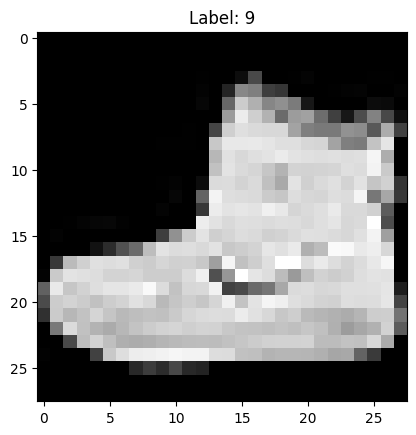

In [13]:
## Code to access the FashionMNIST
import torch
from torch import nn
from torch . utils . data import DataLoader
from torchvision import datasets

from torchvision . transforms import ToTensor , Lambda , Compose
import matplotlib . pyplot as plt

# Download training data from open datasets .
training_data = datasets . FashionMNIST (
    root =" data ",
    train =True ,
    download =True ,
    transform = ToTensor () ,
)

# Download test data from open datasets .
test_data = datasets . FashionMNIST (
    root =" data ",
    train =False ,
    download =True ,
    transform = ToTensor () ,
)


# 1. & 2. Split or get Data into train , validation and test sets
#Specify split fractions : ! Must sum to 1!

#each "record" represents an image and it contains a tensor with pixel values normalized
#and a label with 10 possible classes

#SANITY CHECKING

size_of_signal_dataset = len ( training_data ) # Print size of whole training dataset
print(f'There are {size_of_signal_dataset} signals in the training dataset')

size_of_test_dataset = len ( test_data ) # Print size of whole training dataset
print(f'There are {size_of_test_dataset} signals in the TEST dataset')

# Get the first sample (image and label)
image, label = training_data[0]  # `image` is the tensor, `label` is the target
imagePixels = image.shape[1:]  # [28, 28] for FashionMNIST
imagePixelsDimension= imagePixels[0]*imagePixels[1]


# Check the shape of the image
print(f'Sample of the first image in the train dataset: Shape:{image.shape}, Label:{label}')
print(f'Image dimension: {imagePixels[0]} x {imagePixels[1]} = {imagePixelsDimension}')


plotImage(image,label)


Epoch 1 - Train cost: 2.31095338 - Train Acc: 0.10000000
Epoch 1 - Val cost: 2.31102657 - Val Acc: 0.10000000
Epoch 2 - Train cost: 0.42157361 - Train Acc: 0.85260000
Epoch 2 - Val cost: 0.47683600 - Val Acc: 0.83380000
Epoch 3 - Train cost: 0.45283890 - Train Acc: 0.83606667
Epoch 3 - Val cost: 0.50554180 - Val Acc: 0.82320000
Epoch 4 - Train cost: 0.37714201 - Train Acc: 0.86348333
Epoch 4 - Val cost: 0.42827329 - Val Acc: 0.84700000
Epoch 5 - Train cost: 0.35591730 - Train Acc: 0.86851667
Epoch 5 - Val cost: 0.41910484 - Val Acc: 0.84970000
Epoch 6 - Train cost: 0.36502257 - Train Acc: 0.86691667
Epoch 6 - Val cost: 0.42503521 - Val Acc: 0.84560000
Epoch 7 - Train cost: 0.37006661 - Train Acc: 0.86291667
Epoch 7 - Val cost: 0.43841827 - Val Acc: 0.84590000
Epoch 8 - Train cost: 0.34258771 - Train Acc: 0.87631667
Epoch 8 - Val cost: 0.42402607 - Val Acc: 0.85270000
Epoch 9 - Train cost: 0.34092718 - Train Acc: 0.87338333
Epoch 9 - Val cost: 0.41542470 - Val Acc: 0.85620000
Epoch 10 -

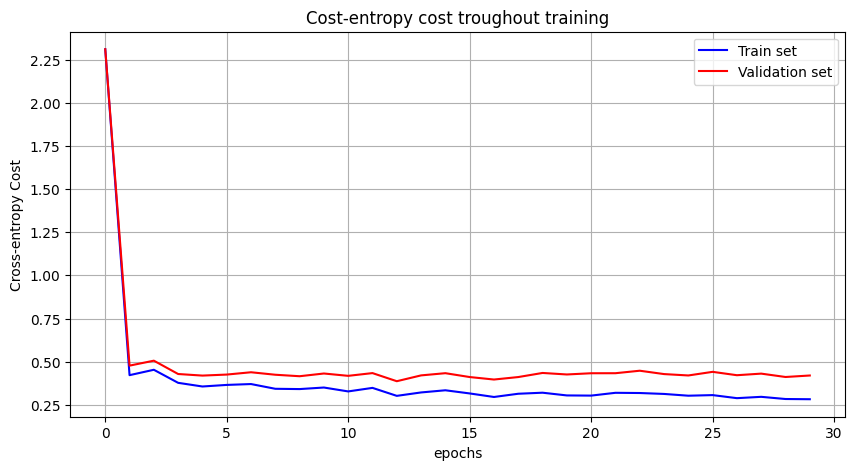

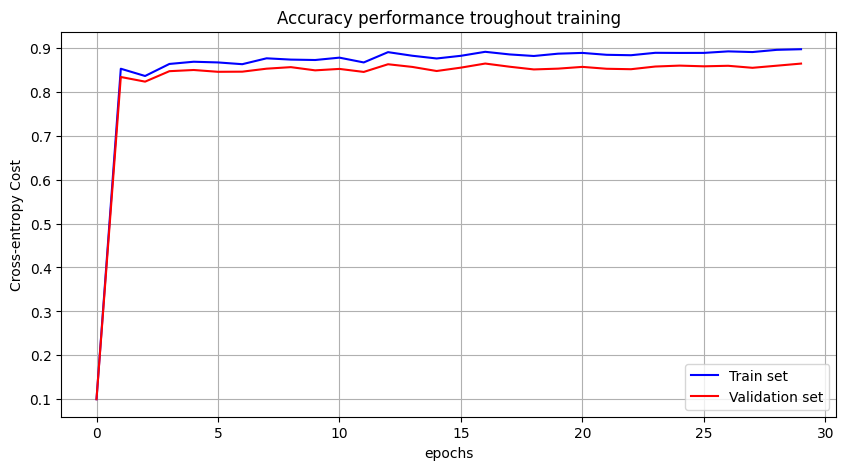

In [15]:
# 3. Make a DataLoader object to take of ’serving ’ you mini - batches of your data .
#Mini-batch size to be somewhere between 1% to 50% of the number of examples in the training data set
batchSize = 32  #int(0.30*len(training_data))
nr_epochs = 30

images_dataloader = DataLoader ( dataset = training_data , batch_size = batchSize , shuffle =True) # create your dataloader from dataset

# 4. Define and construct your neural network architecture .

#FFANN with 1x28x28 inputs (the dimension of each input image) , _ neurons in the first hidden layer , _ neurons in the second hidden layer
# and _ output neurons (for 10 classes) .
model = nn. Sequential (
    nn.Flatten(),  # Flatten the input image (1, 28, 28) -> 784
    nn. Linear ( in_features =imagePixelsDimension, out_features =32) ,
    nn.ReLU() ,
    nn. Linear ( in_features =32, out_features =16) ,
    nn.ReLU() ,
    nn. Linear ( in_features =16, out_features =10),
)

#5. Define and Pick a suitable cost function depending on your problem type
# regression or classifiction problem

#Cost function for training: CrosEntropyLos which already uses SoftMax
# Suitable for multi-class classification
cost_function = nn.CrossEntropyLoss()

#6. Define and Set an Optimizer object that takes care of the SGn Decent update step .
#Stochastic Gradient Descent (SGD) adjusts the model's parameters to minimize the cost function.
#optimizer = torch.optim.SGD( model.parameters () , lr =0.05 )
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)


# 8. Set number of epochs to train for
# Set the epoch interval model performance evaluation , ie evaluate model every k’th epoch .
# NN Training
#
import numpy as np
#A list for keeping track of the cost of each mini-batch associated with each parameter update
#training_minibatch_Js = []
training_epoch_Js = []
validation_epoch_Js = []
training_acc = []
validation_acc = []
#eval_every_kth = int(nr_epochs/2)
# Outer loop : Iterate through whole dataset nr_epochs times and evaluate repeatedly
for epoch_i in range ( nr_epochs ):

    # Model Performance evaluation block
    # EVALUATE Model ’ performance ’ on whole train and validation dataset
    train_cost,train_acc = evaluate_model_performance ( model , training_data,cost_function )
    val_cost, val_acc = evaluate_model_performance ( model , test_data,cost_function )
    # track performance measures from both train and val sets
    print(f"Epoch {epoch_i + 1} - Train cost: {train_cost:.8f} - Train Acc: {train_acc:.8f}")
    print(f"Epoch {epoch_i + 1} - Val cost: {val_cost:.8f} - Val Acc: {val_acc:.8f}")

    #for plotting:
    training_epoch_Js.append(train_cost)
    validation_epoch_Js.append(val_cost)
    training_acc.append(train_acc)
    validation_acc.append(val_acc)

    #if epoch_i % eval_every_kth ==0: # Eval model very k’th epoch .
        # Optional stopping criteria based on validation and/or
        # train set performance / cost to ovoid overfitting .

    # Inner loop : Model Parameter update using mini - batch SGD blocks
    for X_batch , y_batch in images_dataloader : # Iterate through mini - batches
        y_preds = model ( X_batch ) # Make Prediction on mini - batch
        cost = cost_function( y_preds , y_batch )  # Compute cost for mini - batch
        optimizer.zero_grad ()  # Set the grads of all model params to zero .
        cost.backward() # compute and populate gradients of model params
        optimizer.step () # Instruct optimizer to take one update step ( using SGD )

# 9. Evaluate resulting ’ performance ’
#test_cost = evaluate_model_performance ( model , test_dataset )

plotCost2(training_epoch_Js, validation_epoch_Js)
print(f'\nFinal value of the cost function : {cost.item()} \n')
plotCost2(training_acc, validation_acc, title='Accuracy performance troughout training')

(c) Based on your own interests and perhaps some internet search: Propose at least two concrete
potential areas of industrial or research applications where you personally think image classification
of this kind can be (or already is) of practical and commercial importance.



1.   Defects classification in the steel industry
https://www.mdpi.com/1996-1944/17/23/5873
Some features of the pictures are introduced to the FANN having been previously procesed trough Wavelet-Based Image Decomposition


2.   Steel microstructural classification
https://www.nature.com/articles/s41598-018-20037-5



3.   Equipment Defect Detection
 Identifying defects in machinery or tools that might lead to accidents




**Personal reflections and feedback:**

(a) What are the main differences between training a FANN for a regression problem compared to a classification problem - in terms of network structure and cost function?
*   The input tensor must be flattened to convert it in a single dimension array
*   The output layer changes as per the number of classes expected
*   The cost function used is CrossEntropy


(b) Why is it a good result when a 2-class classifier has a large AUC (area under the ROC curve)?


*  Because in that way it is more likely to have a bigger true positive rate than a false positive rate for any accepted false alarm probability


(c) Why is it good/promising when you can see that the accuracy for the training and test set are following each other during/after training?


*   In that way one can make sure that the output of the model for the training data is similar to the output of the model for the test/validation data.

(d) What did you personally find interesting and/or useful and/or informative with the assignment, and why? If you actually did not find it enlightening, in that case we would like to know about why.


*   For me it’s amazing how could somebody (or several persons actually) can come up with all the ideas that are behind the way a neural network “learns”, and to think that this is only the most basic and somehow outdated form of a ANN, makes me consider dedicate myselg more time in the future to learn about this topic
*   The applications are endless and I think this is something worth of dedicating years of investigation.

(e) What did you find frustrating and/or difficult, and/or unnecessary, and why?

*   I wish I could understand and assimilate more rapidly so I can tackle the extra assignments because I think I understand the principles and that I could indeed solve the tasks should I have more time.

(f) What would you suggest as an improvement of this assignment for next year, and why?

*   Perhaps to use datasets focused on industry use cases

(g) Did you spend more than 20 hours completing this exercise? Why?

*   No, in fact this assignment was shorter than the others.




In [5]:
#Code for convert the notebook to html, this way is correctly rendered.
from google.colab import files
!jupyter nbconvert --to html '/content/drive/My Drive/Colab Notebooks/EricMarquez_MA3_AIxIA.ipynb' --output notebook.html
#files.download('notebook.html')


[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/EricMarquez_MA3_AIxIA.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 1671244 bytes to /content/drive/My Drive/Colab Notebooks/notebook.html
